# Stable Diffusion (Dreamlike Anime 1.0)

Dreamlike Anime 1.0はStable Diffusion 1.5をベースにしたアニメの画像を生成することができるモデルです．
- HuggingFace:https://huggingface.co/dreamlike-art/dreamlike-anime-1.0

<a href="https://colab.research.google.com/github/fuyu-quant/data-science-wiki/blob/main/multimodal/text_to_image/stable_diffusion_dreamlike_photoreal_2.ipynb" target="_blank" rel="noopener noreferrer"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
!pip install diffusers==0.23.0
!pip install transformers==4.35.0
!pip install accelerate==0.24.1

In [2]:
from diffusers import StableDiffusionPipeline
import torch

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

### Stable Diffusionとチェックポイントのダウンロード

In [ ]:
model_id = "dreamlike-art/dreamlike-anime-1.0"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to("cuda")

In [13]:
prompt = "anime, masterpiece, high quality, 1girl, solo, long hair, looking at viewer, blush, smile, bangs, blue eyes, skirt, medium breasts, iridescent, gradient, colorful, besides a cottage, in the country"
negative_prompt = 'simple background, duplicate, retro style, low quality, lowest quality, 1980s, 1990s, 2000s, 2005 2006 2007 2008 2009 2010 2011 2012 2013, bad anatomy, bad proportions, extra digits, lowres, username, artist name, error, duplicate, watermark, signature, text, extra digit, fewer digits, worst quality, jpeg artifacts, blurry'
image = pipe(prompt, negative_prompt=negative_prompt).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

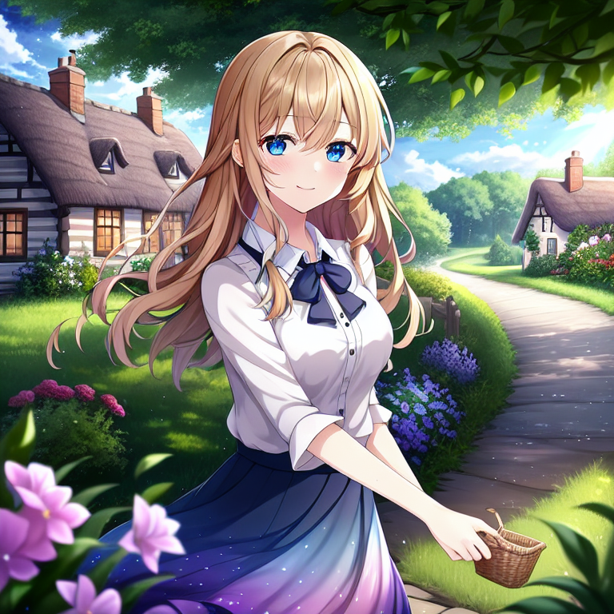

In [14]:
new_width = int(image.width * 0.8)
new_height = int(image.height * 0.8)
new_size = (new_width, new_height)

resized_img = image.resize(new_size)
resized_img